<a href="https://colab.research.google.com/github/Sam-415/Marketing-research-methods---Samhita_-Jio-Institute/blob/Medium_Article/MediumArticle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal number of components: 5

Top feature loadings for first component:
Income                 0.418625
NumCatalogPurchases    0.389213
MntMeatProducts        0.378764
MntWines               0.371213
NumStorePurchases      0.360959
Name: PC1, dtype: float64


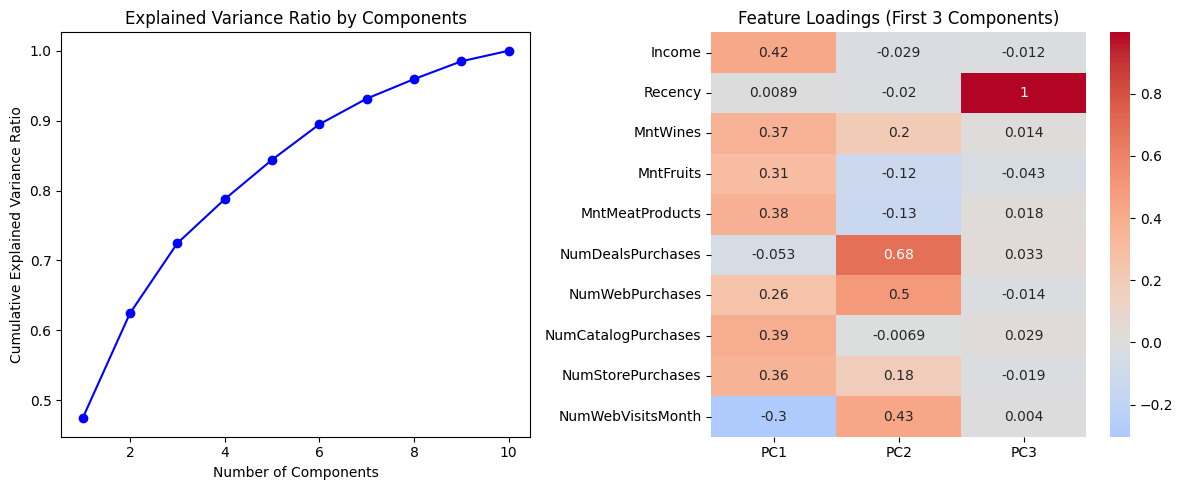

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def run_pca_analysis(data_path='/content/ifood_df.csv'):
    # Load data
    df = pd.read_csv(data_path)

    # Select features for PCA
    features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth']

    # Prepare the data
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Get component loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(len(features))],
        index=features
    )

    # Determine optimal number of components
    n_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1

    # Create visualization
    plt.figure(figsize=(12, 5))

    # Plot explained variance
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(explained_variance_ratio) + 1),
             cumulative_variance_ratio, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Components')

    # Plot feature loadings heatmap
    plt.subplot(1, 2, 2)
    sns.heatmap(loadings.iloc[:, :3], annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Loadings (First 3 Components)')

    plt.tight_layout()

    return {
        'pca_model': pca,
        'loadings': loadings,
        'explained_variance': explained_variance_ratio,
        'n_optimal_components': n_components,
        'transformed_data': X_pca
    }

if __name__ == "__main__":
    results = run_pca_analysis()
    print(f"Optimal number of components: {results['n_optimal_components']}")
    print("\nTop feature loadings for first component:")
    print(results['loadings']['PC1'].sort_values(ascending=False).head())

Linear Regression R² Score: 0.7804494449522644

Logistic Regression Accuracy: 0.9501133786848073

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       417
           1       0.62      0.21      0.31        24

    accuracy                           0.95       441
   macro avg       0.79      0.60      0.64       441
weighted avg       0.94      0.95      0.94       441



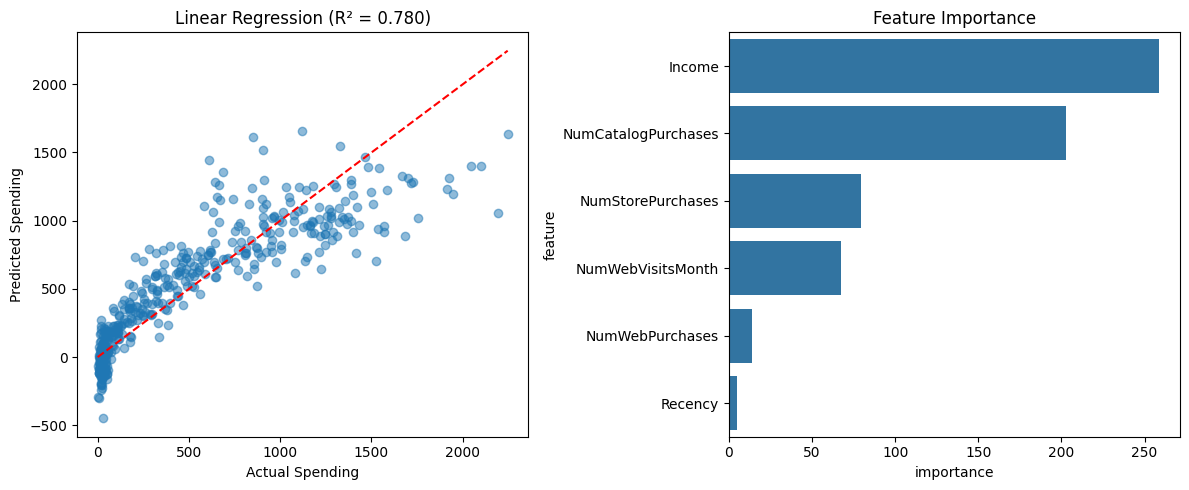

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def run_regression_analysis(data_path='/content/ifood_df.csv'):
    # Load data
    df = pd.read_csv(data_path)

    # Prepare features for both models
    features = ['Income', 'Recency', 'NumWebVisitsMonth', 'NumCatalogPurchases',
                'NumStorePurchases', 'NumWebPurchases']

    # Linear Regression - Predict total spending
    total_spending = df[['MntWines', 'MntFruits', 'MntMeatProducts']].sum(axis=1)

    # Prepare data
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data for linear regression
    X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
        X_scaled, total_spending, test_size=0.2, random_state=42
    )

    # Fit linear regression
    linear_model = LinearRegression()
    linear_model.fit(X_train_lin, y_train_lin)

    # Get linear regression predictions
    lin_pred = linear_model.predict(X_test_lin)
    lin_score = r2_score(y_test_lin, lin_pred)

    # Calculate feature importance for linear regression
    linear_importance = pd.DataFrame({
        'feature': features,
        'importance': np.abs(linear_model.coef_)
    }).sort_values('importance', ascending=False)

    # Logistic Regression - Predict campaign acceptance
    y_campaign = df['AcceptedCmp1']

    # Split data for logistic regression
    X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
        X_scaled, y_campaign, test_size=0.2, random_state=42
    )

    # Fit logistic regression
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train_log, y_train_log)

    # Get logistic regression predictions
    log_pred = logistic_model.predict(X_test_log)
    log_score = accuracy_score(y_test_log, log_pred)

    # Visualizations
    plt.figure(figsize=(12, 5))

    # Plot linear regression results
    plt.subplot(1, 2, 1)
    plt.scatter(y_test_lin, lin_pred, alpha=0.5)
    plt.plot([y_test_lin.min(), y_test_lin.max()],
             [y_test_lin.min(), y_test_lin.max()], 'r--')
    plt.xlabel('Actual Spending')
    plt.ylabel('Predicted Spending')
    plt.title(f'Linear Regression (R² = {lin_score:.3f})')

    # Plot feature importance
    plt.subplot(1, 2, 2)
    sns.barplot(data=linear_importance, x='importance', y='feature')
    plt.title('Feature Importance')

    plt.tight_layout()

    return {
        'linear_model': {
            'model': linear_model,
            'score': lin_score,
            'feature_importance': linear_importance
        },
        'logistic_model': {
            'model': logistic_model,
            'score': log_score,
            'classification_report': classification_report(y_test_log, log_pred)
        }
    }

if __name__ == "__main__":
    results = run_regression_analysis()
    print("Linear Regression R² Score:", results['linear_model']['score'])
    print("\nLogistic Regression Accuracy:", results['logistic_model']['score'])
    print("\nClassification Report:")
    print(results['logistic_model']['classification_report'])

Feature Importance Rankings:
               feature  importance
6             MntWines  369.749784
0               Income   60.789695
7            MntFruits   39.455724
3  NumCatalogPurchases   18.029091
2    NumWebVisitsMonth    8.210352
5      NumWebPurchases    6.779713
4    NumStorePurchases    5.904540
1              Recency    3.301620


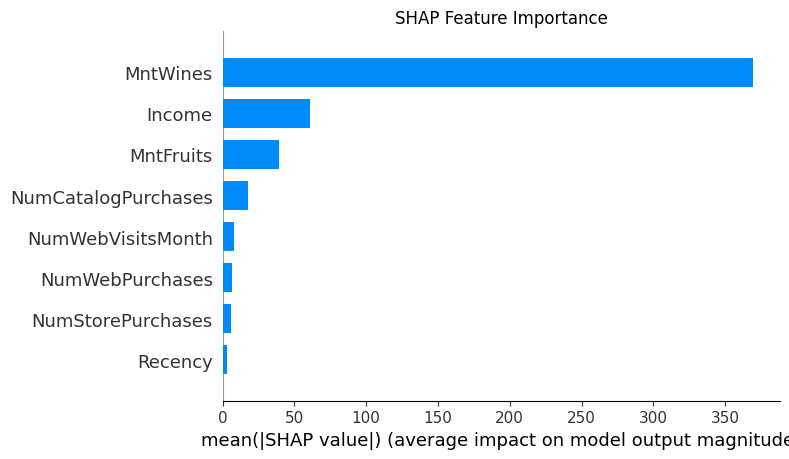

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

def run_shapley_analysis(data_path='/content/ifood_df.csv'):
    # Load data
    df = pd.read_csv(data_path)

    # Prepare features
    features = ['Income', 'Recency', 'NumWebVisitsMonth', 'NumCatalogPurchases',
                'NumStorePurchases', 'NumWebPurchases', 'MntWines', 'MntFruits']
    X = df[features]

    # Target variable (total spending)
    y = df[['MntWines', 'MntFruits', 'MntMeatProducts']].sum(axis=1)

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Calculate SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Create SHAP summary plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance')
    plt.tight_layout()

    # Calculate feature importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': np.abs(shap_values).mean(axis=0)
    }).sort_values('importance', ascending=False)

    return {
        'shap_values': shap_values,
        'feature_importance': feature_importance,
        'explainer': explainer,
        'model': model
    }

if __name__ == "__main__":
    results = run_shapley_analysis()
    print("Feature Importance Rankings:")
    print(results['feature_importance'])

Channel Contribution to Revenue:
   channel  coefficient
0      Web    72.974657
1  Catalog   290.170255
2    Store   146.318345

Channel ROI:
   channel  revenue_per_transaction
0      Web               121.413957
1  Catalog               188.209326
2    Store                85.493731


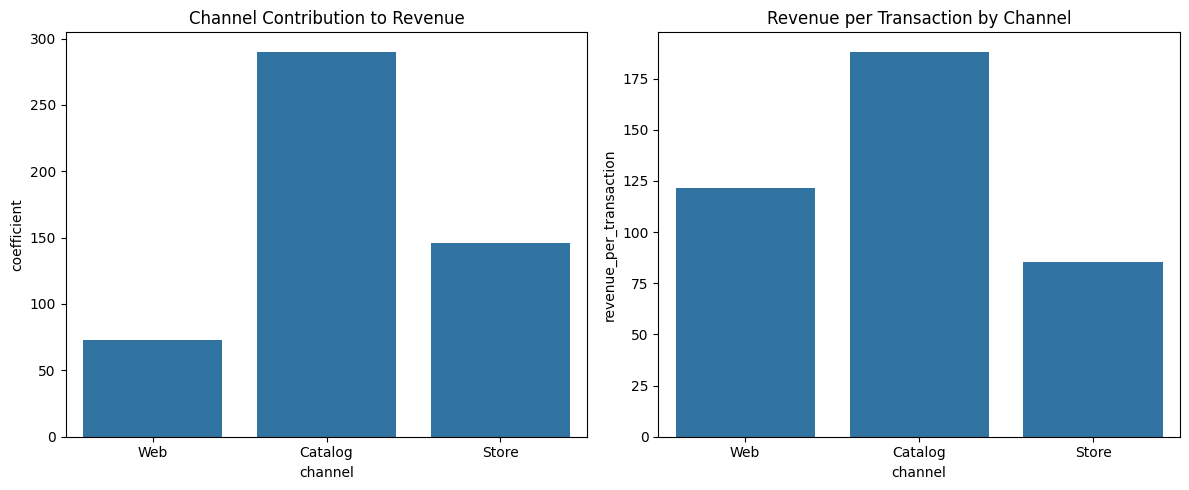

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def run_marketing_mix_model(data_path='/content/ifood_df.csv'):
    # Load data
    df = pd.read_csv(data_path)

    # Prepare features for marketing mix model
    marketing_channels = {
        'Web': 'NumWebPurchases',
        'Catalog': 'NumCatalogPurchases',
        'Store': 'NumStorePurchases'
    }

    product_categories = {
        'Wines': 'MntWines',
        'Fruits': 'MntFruits',
        'Meat': 'MntMeatProducts'
    }

    # Calculate channel effectiveness
    channel_data = df[list(marketing_channels.values())]
    total_revenue = df[list(product_categories.values())].sum(axis=1)

    # Prepare data for modeling
    X = channel_data
    y = total_revenue

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit Ridge regression (more stable than OLS for marketing mix)
    model = Ridge(alpha=1.0)
    model.fit(X_scaled, y)

    # Calculate channel contribution
    channel_contribution = pd.DataFrame({
        'channel': marketing_channels.keys(),
        'coefficient': model.coef_
    })

    # Calculate ROI by channel
    channel_roi = pd.DataFrame({
        'channel': marketing_channels.keys(),
        'revenue_per_transaction': [
            total_revenue.sum() / df[channel].sum()
            for channel in marketing_channels.values()
        ]
    })

    # Visualizations
    plt.figure(figsize=(12, 5))

    # Plot channel contribution
    plt.subplot(1, 2, 1)
    sns.barplot(data=channel_contribution, x='channel', y='coefficient')
    plt.title('Channel Contribution to Revenue')

    # Plot ROI by channel
    plt.subplot(1, 2, 2)
    sns.barplot(data=channel_roi, x='channel', y='revenue_per_transaction')
    plt.title('Revenue per Transaction by Channel')

    plt.tight_layout()

    return {
        'model': model,
        'channel_contribution': channel_contribution,
        'channel_roi': channel_roi
    }

if __name__ == "__main__":
    results = run_marketing_mix_model()
    print("Channel Contribution to Revenue:")
    print(results['channel_contribution'])
    print("\nChannel ROI:")
    print(results['channel_roi'])

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import seaborn as sns

def run_survival_analysis(data_path='/content/ifood_df.csv'):
    """
    Runs Cox Proportional Hazard Model analysis with corrected coefficient access
    """
    # Load data
    df = pd.read_csv(data_path)

    # Prepare data for survival analysis
    survival_data = df.copy()

    # Create duration variable (using Recency)
    survival_data['duration'] = survival_data['Recency']

    # Create event indicator (1 if customer made a purchase recently)
    survival_data['event'] = (survival_data['Recency'] < survival_data['Recency'].median()).astype(int)

    # Select features for analysis
    features = ['duration', 'event', 'Income', 'NumWebVisits',
                'NumCatalogPurchases', 'NumStorePurchases']

    # Fit Cox model
    cph = CoxPHFitter()
    cph.fit(survival_data[features], duration_col='duration',
            event_col='event', show_progress=False)

    # Get model summary as DataFrame
    summary_df = cph.summary

    # Create visualization
    plt.figure(figsize=(15, 6))

    # Plot 1: Baseline survival function
    plt.subplot(1, 2, 1)
    baseline_survival = cph.baseline

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=c9d2856da9f3d9fda2433f14e427853658c2d2ffaac6755f348e7d61e23d490f
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


<ipython-input-22-402661939f97>:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_insights = survival_data.groupby('risk_segment').agg({



Hazard Ratios by Feature:
                                 feature  hazard_ratio   p_value   lower_ci  \
covariate                                                                     
NumStorePurchases      NumStorePurchases      1.011113  0.400921   0.194893   
NumWebVisitsMonth      NumWebVisitsMonth      1.009426  0.571645   0.333119   
Income                            Income      1.000001  0.608813   0.366754   
NumCatalogPurchases  NumCatalogPurchases      0.975254  0.128751  19.149448   

                     upper_ci  
covariate                      
NumStorePurchases    5.245694  
NumWebVisitsMonth    3.058789  
Income               2.726630  
NumCatalogPurchases  0.049668  

Customer Segment Insights:
                Income NumWebVisitsMonth NumCatalogPurchases  \
                  mean              mean                mean   
risk_segment                                                   
Low Risk      58349.71              3.92                4.99   
Medium Risk   43576.22

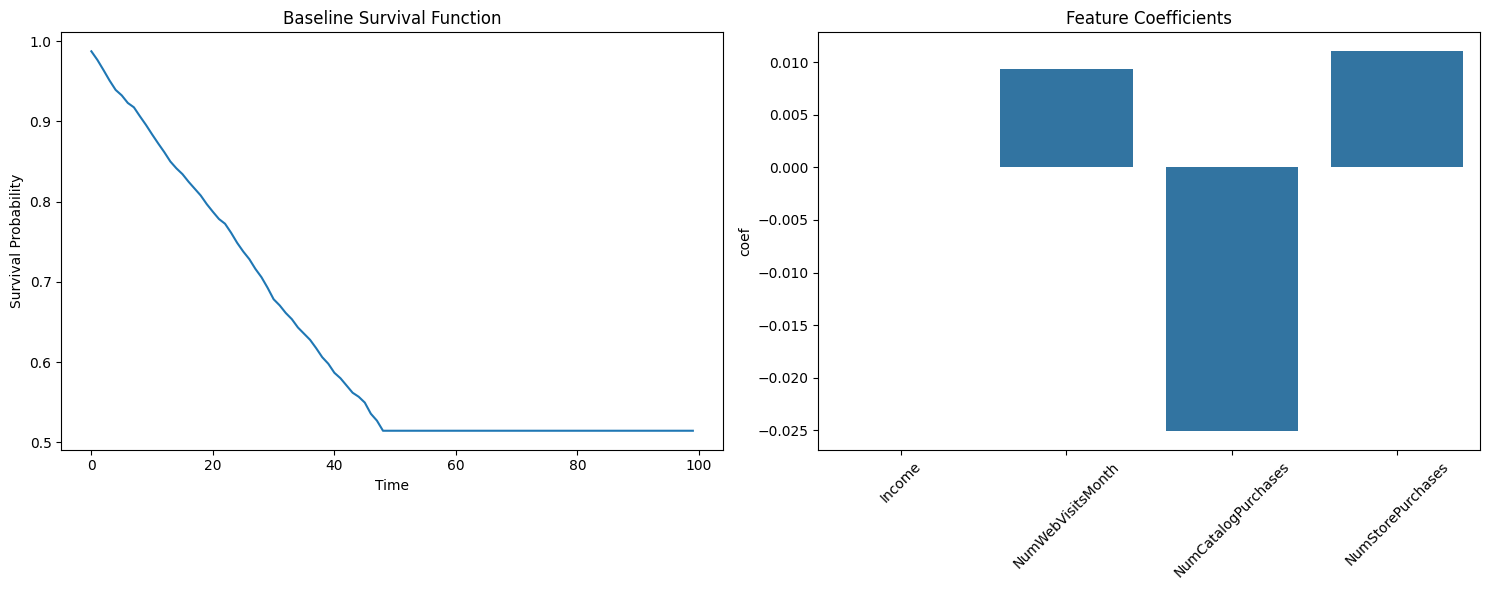

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import seaborn as sns

def run_survival_analysis(data_path='/content/ifood_df.csv'):
    """
    Runs Cox Proportional Hazard Model analysis with corrected coefficient access
    """
    # Load data
    df = pd.read_csv(data_path)

    # Prepare data for survival analysis
    survival_data = df.copy()

    # Create duration variable (using Recency)
    survival_data['duration'] = survival_data['Recency']

    # Create event indicator (1 if customer made a purchase recently)
    survival_data['event'] = (survival_data['Recency'] < survival_data['Recency'].median()).astype(int)

    # Select features for analysis
    features = ['duration', 'event', 'Income', 'NumWebVisitsMonth',
                'NumCatalogPurchases', 'NumStorePurchases']

    # Fit Cox model
    cph = CoxPHFitter()
    cph.fit(survival_data[features], duration_col='duration',
            event_col='event', show_progress=False)

    # Get model summary as DataFrame
    summary_df = cph.summary

    # Create visualization
    plt.figure(figsize=(15, 6))

    # Plot 1: Baseline survival function
    plt.subplot(1, 2, 1)
    baseline_survival = cph.baseline_survival_
    plt.plot(baseline_survival.index, baseline_survival.values)
    plt.title('Baseline Survival Function')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')

    # Plot 2: Feature coefficients
    plt.subplot(1, 2, 2)
    feature_names = [f for f in features if f not in ['duration', 'event']]
    coefficients = summary_df.loc[feature_names, 'coef']

    sns.barplot(x=feature_names, y=coefficients)
    plt.title('Feature Coefficients')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Calculate risk scores for each customer
    survival_data['risk_score'] = cph.predict_partial_hazard(survival_data[features])

    # Create customer segments based on risk scores
    survival_data['risk_segment'] = pd.qcut(survival_data['risk_score'],
                                          q=3,
                                          labels=['Low Risk', 'Medium Risk', 'High Risk'])

    # Generate segment insights
    segment_insights = survival_data.groupby('risk_segment').agg({
        'Income': 'mean',
        'NumWebVisitsMonth': 'mean',
        'NumCatalogPurchases': 'mean',
        'NumStorePurchases': 'mean',
        'risk_score': ['count', 'mean']
    }).round(2)

    # Prepare hazard ratios with confidence intervals
    hazard_ratios = pd.DataFrame({
        'feature': feature_names,
        'hazard_ratio': np.exp(summary_df.loc[feature_names, 'coef']),
        'p_value': summary_df.loc[feature_names, 'p'],
        'lower_ci': np.exp(summary_df.loc[feature_names, 'coef'] - 1.96 * summary_df.loc[feature_names, 'z']),
        'upper_ci': np.exp(summary_df.loc[feature_names, 'coef'] + 1.96 * summary_df.loc[feature_names, 'z'])
    }).sort_values('hazard_ratio', ascending=False)

    return {
        'model': cph,
        'summary': summary_df,
        'hazard_ratios': hazard_ratios,
        'segment_insights': segment_insights,
        'risk_scores': survival_data[['risk_score', 'risk_segment']]
    }

if __name__ == "__main__":
    # Run the analysis
    results = run_survival_analysis()

    # Print key findings
    print("\nHazard Ratios by Feature:")
    print(results['hazard_ratios'])

    print("\nCustomer Segment Insights:")
    print(results['segment_insights'])

    # Print model statistics
    print("\nModel Summary Statistics:")
    print(results['summary'][['coef', 'exp(coef)', 'p']])